In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#1
df = pd.read_csv('adult_data.csv')

#2
df.shape

(32561, 15)

In [3]:
#3
df.head(10)

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
#4
df.columns

Index(['Age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
#5
df.isnull().sum()

#No Null Values

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

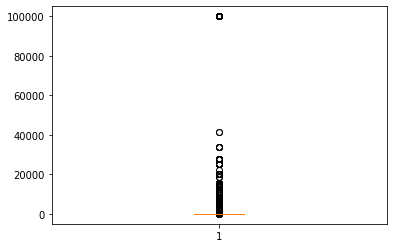

In [6]:
#6 Checking for outliers 
plt.boxplot(df['capital-gain'])
plt.show()

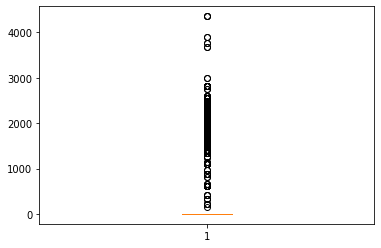

In [7]:
plt.boxplot(df['capital-loss'])
plt.show()

In [8]:
#7
#“>50K” = 1 and “<=50K ” = 0
df_categorical = df.select_dtypes(include='object')

  

label_encoder = preprocessing.LabelEncoder()

for i in df_categorical.columns:
    df[i]= label_encoder.fit_transform(df[i])


In [9]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [10]:
#8
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size= 0.2)


In [11]:
#9
model = GaussianNB()
model.fit(X_train, Y_train)

C:\Users\Divyansh K. Pathak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [12]:
#10
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
#11
acc = accuracy_score(Y_test, pred)
acc

0.7902656226009519

In [14]:
matrix = pd.DataFrame(
        confusion_matrix(Y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,4682,217
Actual 1,1149,465


In [15]:
#12
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4899
           1       0.68      0.29      0.41      1614

    accuracy                           0.79      6513
   macro avg       0.74      0.62      0.64      6513
weighted avg       0.77      0.79      0.76      6513

